In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py
import api as pyq 

/Users/ksu/Software/anaconda3/lib/python3.11/site-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


In [84]:
# Wavefunction generation
import scf_runs, importlib
modules = [scf_runs]
for m in modules:
    importlib.reload(m)
from scf_runs import run_lda_li, run_casci, run_lda_he
scf_checkfile, opt_checkfile, mf_lda = run_lda_li()
# ci_checkfile, mc = run_casci(scf_checkfile, nroots=10, ncas =3)

/Users/ksu/Documents/GitHub/pyqmc/pyqmc/api.py
/Users/ksu/Software/anaconda3/lib/python3.11/site-packages/pyscf/__init__.py
Li atom neutral LDA spin=1
HF
converged SCF energy = -7.43242052759577  <S^2> = 0.75000054  2S+1 = 2.0000005
LDA
converged SCF energy = -7.34133592929817  <S^2> = 0.75000178  2S+1 = 2.0000018


In [30]:
opt_settings = {'nconfig': 1000,
               'max_iterations':2}
vmc_settings = {'tstep' : 0.3,
                'nconfig': 1000,
                'nblocks':100,
                'nsteps_per_block':10}

vmc_cusp=True
abvmc_cusp=False

In [40]:
# import wftools, bosonrecipes, importlib, recipes, boson_stochastic_reconfiguration, bosonsamplemany, bosonrecipes, bosonslater, bosonwf, bosonaccumulators, bosonjastrowspin, bosonlinemin, bosonmc, bosonmultiplywf, bosonwftools 
# modules = [bosonrecipes,wftools, boson_stochastic_reconfiguration, bosonsamplemany, bosonrecipes, bosonrecipes, bosonslater, bosonwf, bosonaccumulators, bosonjastrowspin, bosonlinemin, bosonmc, bosonmultiplywf, bosonwftools] # Reloads recipes.py file after each update
# for m in modules:
#     importlib.reload(m)
import os, bosonrecipes    
# Jastrow optimization
bosonsj = "boson-test-ovlp.hdf5"    
for fname in [bosonsj]:
    if os.path.isfile(fname):
        os.remove(fname)
print("RUNNING VMC OPTIMIZATION")
bosonrecipes.ABOPTIMIZE(scf_checkfile, bosonsj, 
                        ci_checkfile=ci_checkfile, 
                        verbose=True,
                        jastrow_kws={"ion_cusp":abvmc_cusp},
                       **opt_settings)
# Jastrow optimization results
# bosonrecipes.read_abopt(bosonsj)

RUNNING VMC OPTIMIZATION
Number of determinants in the bosonic wavefunction= 9
Using spherical guess
starting warmup
finished warmup
----------vmc done
Gradient norm:  0.8566626568951546
Dot product between gradient and SR step:  0.7491222706296743
descent en -7.071535756416312 0.010633615879708121
energies from correlated sampling [-6.5833407  -6.74511342 -6.89062084 -7.01473954 -7.11338348]
----------vmc done
Gradient norm:  0.6057225744656514
Dot product between gradient and SR step:  0.7105046128844477
descent en -7.171606684814168 0.027035128419277337
energies from correlated sampling [-6.77988047 -6.94801523 -7.08229155 -7.18646351 -7.26403206]
----------vmc done
Gradient norm:  0.3924640889912254
Dot product between gradient and SR step:  0.7776069566340136
descent en -7.285904187311559 0.012022923195326673
energies from correlated sampling [-7.3197489  -7.35251622 -7.3802805  -7.40165567 -7.41515423]
----------vmc done
Gradient norm:  0.3547513827347956
Dot product between grad

(<multiplywf.MultiplyWF at 0x38c321590>,
 [{'energy': -7.071535756416312,
   'energy_error': 0.010633615879708121,
   'x': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
   'iteration': 0,
   'nconfig': 100,
   'pgrad': array([-0.27904061, -0.26866998, -0.31586612, -0.31502446, -0.28827605,
          -0.2721155 , -0.18392289, -0.1662652 , -0.07041674, -0.32171448,
           0.        , -0.02661818, -0.22322215,  0.        , -0.00692482,
          -0.08453914,  0.        ]),
   'SRdot': 0.7491222706296743,
   'tau': array([-0.06666667,  0.        ,  0.06666667,  0.13333333,  0.2       ]),
   'yfit': array([-6.5833407 , -6.74511342, -6.89062084, -7.01473954, -7.11338348]),
   'est_min': 0.2},
  {'energy': -7.171606684814168,
   'energy_error': 0.027035128419277337,
   'x': array([ 0.11143389,  0.11888175,  0.17319608,  0.15787646,  0.18595212,
           0.15287499,  0.12673301,  0.10413141, -0.01801318, -0.00952505,
           0.        , -0.012888  , -0.0

In [14]:
# import matplotlib.pyplot as plt
# df=recipes.read_opt(bosonsj)
# plt.xlabel('Iteration')
# plt.ylabel('Energy (Ha)')
# plt.title('ABVMC optimization')
# plt.errorbar(df['iteration'], df['energy'], yerr =df['var'])

In [130]:
#ABVMC with jastrows

import bosonrecipes, bosonaccumulators, mc, bosonslater
modules = [bosonrecipes, bosonaccumulators, mc, bosonslater]
for m in modules:
    importlib.reload(m)

# Jastrow optimization
abvmc_file ='abvmc-test-ovlp.hdf5'
for fname in [abvmc_file]:
    if os.path.isfile(fname):
        os.remove(fname)

opt_settings = {'nconfig': 100,
               'max_iterations':6}
vmc_settings = {'tstep' : 0.3,
                'nconfig': 1000,
                'nblocks':20,
                'nsteps_per_block':10}

abvmc_cusp=False
df_abvmc = bosonrecipes.ABVMC(scf_checkfile, 
                              abvmc_file, 
                              load_parameters=bosonsj, 
                              ci_checkfile=ci_checkfile,
                              verbose=True,  
                              jastrow_kws={"ion_cusp":abvmc_cusp},
                              **vmc_settings)

Number of determinants in the bosonic wavefunction= 9
Using spherical guess
--------------------vmc done


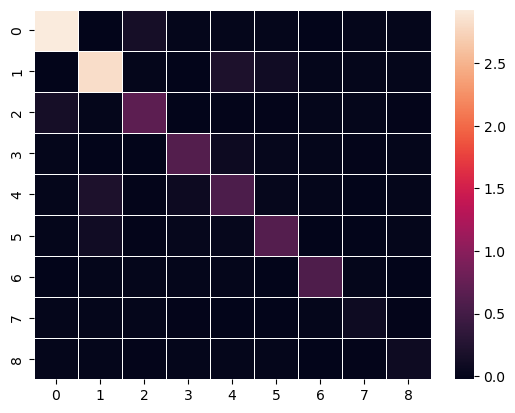

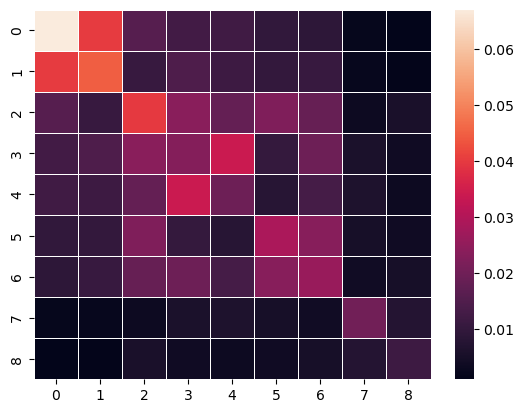

[1.99713969 2.24446949 0.61260464 0.71388688 0.64487569 0.63473672
 0.54610005 0.05450961 0.06810171]


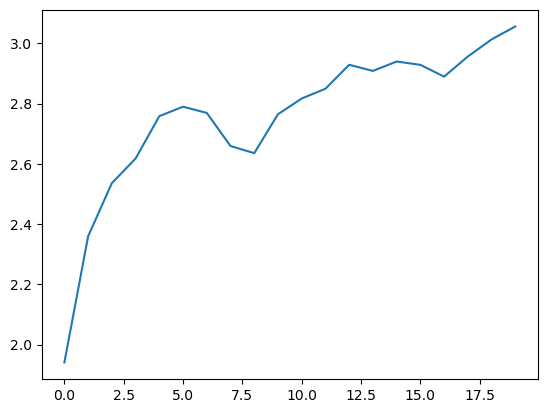

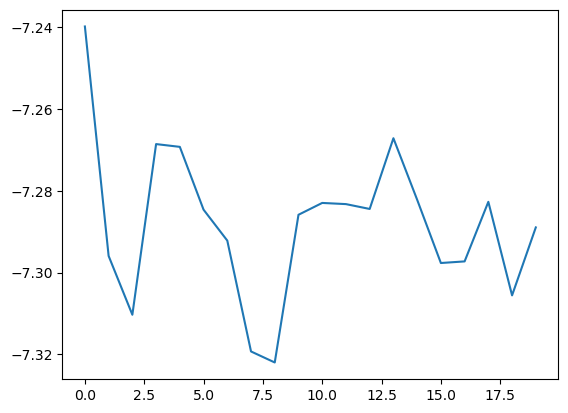

In [138]:
import h5py
abvmc_file ='abvmc-test-ovlp.hdf5'
f = h5py.File(abvmc_file)
matrices = f['excitationsdelta'][...]
ovlp = f['excitationsovlp'][...]
import numpy as np
ovlp_avg = np.mean(ovlp[10:], axis=0)
ovlp_std = np.std(ovlp[10:], axis=0)
import seaborn as sns
ax = sns.heatmap(ovlp_avg, linewidth=0.5)
plt.show()
ax = sns.heatmap(ovlp_std, linewidth=0.5)
plt.show()
print(np.trace(ovlp))
plt.plot(ovlp[...,0,0])
plt.show()
energy = f['energytotal'][...]
plt.plot(energy)
plt.show()

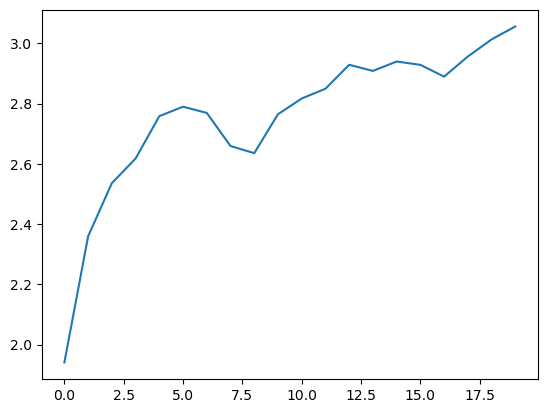

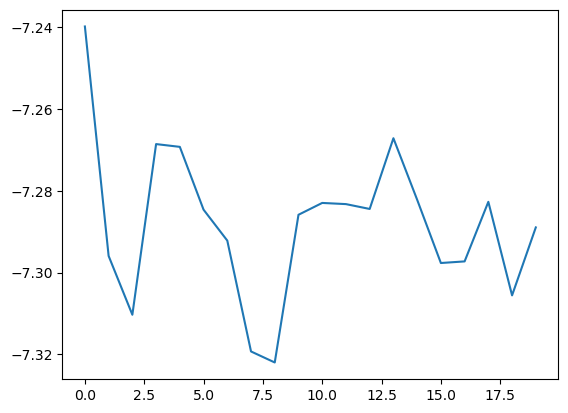

In [112]:
matrices = f['excitationsdelta'][...]
ovlp = f['excitationsovlp'][...]
matrices.shape

(20, 9, 9)

In [113]:
# plt.plot(matrices[...,6,6])

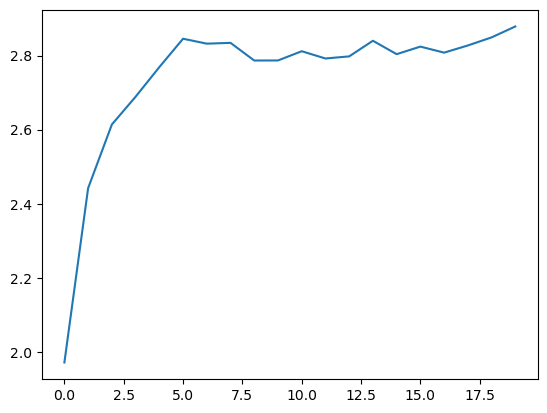

In [114]:
plt.plot(ovlp[...,0,0])

In [58]:
import numpy as np
matrix_avg = np.mean(matrices[10:], axis=0)
matrix_std = np.std(matrices[10:], axis=0)
ovlp_avg = np.mean(ovlp[10:], axis=0)
ovlp_std = np.std(ovlp[10:], axis=0)
matrix_avg.shape


(4, 4)

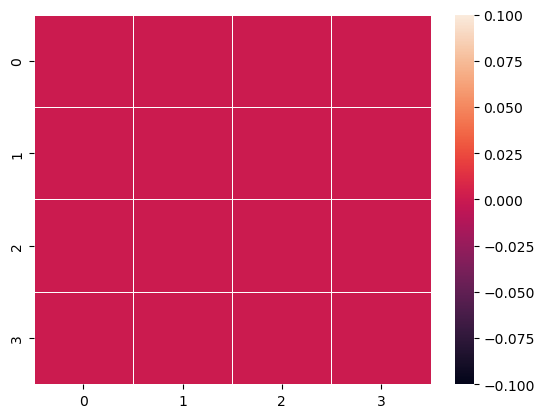

In [59]:
import seaborn as sns
ax = sns.heatmap(matrix_avg, linewidth=0.5)
plt.show()
ax = sns.heatmap(matrix_std, linewidth=0.5)
plt.show()